# Portfolio & Risk Analysis with Italian and American Assets (Stocks and ETF's)

The main purpose of this project is to pass through some of the basic and recommendable steps for the construction, analysis and structuring of an investment portfolio. We will simulate a scernario with italian and american assets (since I'm located in Italy), taking advantage of some of the most used and effective risk and return analysis tools.

In this project I'll be using the tools and techniques I've learned in the Datacamp's Python for Finance courses (Finance Fundamentals in Python & Applied Finance in Python).

Throughout the code I'll be presenting and introducing in a didatic and summarized approach the purpose and the concepts behind each of the applied tools, theories and formulas.

## Part I - Creating the portfolio and evaluating returns

### Italian assets - Creating the basket with the most liquid stocks

In [354]:
#Installing the financial data library
!pip install yfinance

In [355]:
#Importing the library
import yfinance as yf

In [356]:
#Deactivating warning messages
import warnings
warnings.filterwarnings('ignore')

Creating a list with the most liquid italian assets as in May 27th 2025:
* **Ferrari (RACE)** -> Luxury brand & car's Manufacturing
* **Unicredit (UCG)** -> Banking & financial Services
* **Enel (ENEL)** -> Energy Supply
* **Generali (G)** -> Insurance

Note: There was as 3rd place by market capitalization Intesa San Paolo, which is also a company in the area of banking. To enable our portfolio to be diverse (actual diversity level is to be validated using a more technical approach later on) I decided to keep just one company from each area.

In [357]:
#Establishing a list with the italian assets' tickers
it_tickers = ['RACE.MI', 'UCG.MI', 'ENEL.MI', 'G.MI']

In [358]:
#Importing their price data
it_stocks = yf.download(it_tickers, period='5y')['Close']

[*********************100%***********************]  4 of 4 completed


In [359]:
#Creating a column to aggregate the prices as in a "Italian Asset's Basket"
it_stocks['IT Stocks'] = it_stocks.sum(axis=1)

In [360]:
it_stocks.head()

Ticker,ENEL.MI,G.MI,RACE.MI,UCG.MI,IT Stocks
Date,,,,,
2020-05-29,5.028013,8.929740,146.995285,6.095869,167.048907
2020-06-01,5.098687,9.219414,147.237228,6.286713,167.842042
2020-06-02,5.237848,9.498354,147.575928,6.389291,168.701421
2020-06-03,5.467354,9.973987,151.979034,6.719293,174.139668
2020-06-04,5.453511,10.016903,150.188736,6.770978,172.430128


In [361]:
#Controlling if the data frame structure is correct
it_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1274 entries, 2020-05-29 to 2025-05-29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ENEL.MI    1274 non-null   float64
 1   G.MI       1274 non-null   float64
 2   RACE.MI    1274 non-null   float64
 3   UCG.MI     1274 non-null   float64
 4   IT Stocks  1274 non-null   float64
dtypes: float64(5)
memory usage: 59.7 KB


In [362]:
#Renaming the columns for a easier understanding of the data
it_stocks.rename(columns={'RACE.MI': 'Ferrari', 'UCG.MI': 'Unicredit', 'ENEL.MI': 'Enel', 'G.MI': 'Generali'}, inplace=True)

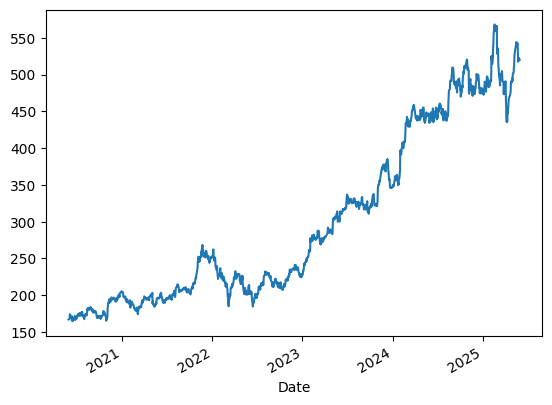

In [363]:
#Plotting the "Italian Basket prices over the last five years
it_stocks['IT Stocks'].plot();

### Italian assets - Evaluating returns using cumulative returns

In [364]:
#Create a new data frame for the returns
it_stocks_returns = it_stocks['IT Stocks'].pct_change()
it_stocks_returns = it_stocks_returns + 1

In [365]:
#Converting the newly created object in a data frame
it_stocks_returns = it_stocks_returns.to_frame()
it_stocks_returns.columns = ['Returns']

In [366]:
#Calculating the cumulative return
it_stocks_returns['Cumulative Return'] = it_stocks_returns['Returns'].cumprod()
it_stocks_returns.dropna(how='any')

,Returns,Cumulative Return
Date,,
2020-06-01,1.004748,1.004748
2020-06-02,1.005120,1.009892
2020-06-03,1.032236,1.042447
2020-06-04,0.990183,1.032213
2020-06-05,0.996537,1.028638
...,...,...
2025-05-23,0.967002,3.097171
2025-05-26,1.008796,3.124414
2025-05-27,1.001207,3.128186


In [367]:
#Visualizing the return data frame
it_stocks_returns

,Returns,Cumulative Return
Date,,
2020-05-29,NaN,NaN
2020-06-01,1.004748,1.004748
2020-06-02,1.005120,1.009892
2020-06-03,1.032236,1.042447
2020-06-04,0.990183,1.032213
...,...,...
2025-05-23,0.967002,3.097171
2025-05-26,1.008796,3.124414
2025-05-27,1.001207,3.128186


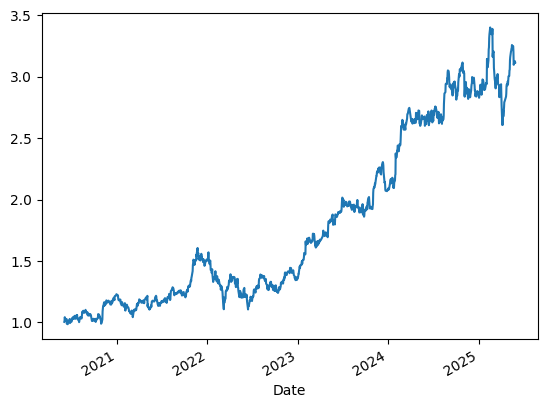

In [368]:
#Visualizing the return plot
it_stocks_returns['Cumulative Return'].plot();

As we can see the plot for cumulative returns is very similar to the one for prices, indicating the our processing was done correcly.

### Italian assets - Evaluating returns by normalizing prices

In [369]:
it_stocks

Ticker,Enel,Generali,Ferrari,Unicredit,IT Stocks
Date,,,,,
2020-05-29,5.028013,8.929740,146.995285,6.095869,167.048907
2020-06-01,5.098687,9.219414,147.237228,6.286713,167.842042
2020-06-02,5.237848,9.498354,147.575928,6.389291,168.701421
2020-06-03,5.467354,9.973987,151.979034,6.719293,174.139668
2020-06-04,5.453511,10.016903,150.188736,6.770978,172.430128
...,...,...,...,...,...
2025-05-23,8.079000,33.029999,420.700012,55.570000,517.379011
2025-05-26,8.130000,33.220001,424.399994,56.180000,521.929996
2025-05-27,8.070000,33.189999,424.799988,56.500000,522.559986


In [370]:
#Normalizing all the single price data
it_stocks_norm = it_stocks.div(it_stocks.iloc[0])

In [371]:
#Visualizing the data frame
it_stocks_norm.head()

Ticker,Enel,Generali,Ferrari,Unicredit,IT Stocks
Date,,,,,
2020-05-29,1.000000,1.000000,1.000000,1.000000,1.000000
2020-06-01,1.014056,1.032439,1.001646,1.031307,1.004748
2020-06-02,1.041733,1.063676,1.003950,1.048135,1.009892
2020-06-03,1.087379,1.116940,1.033904,1.102270,1.042447
2020-06-04,1.084625,1.121746,1.021725,1.110749,1.032213


In [372]:
#Calculating and printing the annualized return of each of the basket's single asset and the aggregated one
for i in it_stocks_norm.columns:
  annualized_return = it_stocks_norm[i].iloc[-1]**(1/5)
  print('The annualized return of ' + i + ' over the period 2020-2025 is of: ' + str(round(annualized_return,2)) + '%')

The annualized return of Enel over the period 2020-2025 is of: 1.1%
The annualized return of Generali over the period 2020-2025 is of: 1.29%
The annualized return of Ferrari over the period 2020-2025 is of: 1.24%
The annualized return of Unicredit over the period 2020-2025 is of: 1.56%
The annualized return of IT Stocks over the period 2020-2025 is of: 1.25%


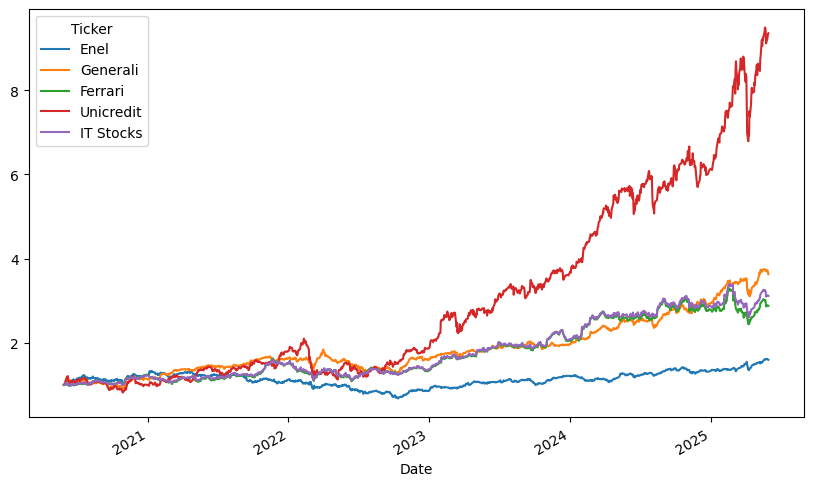

In [373]:
#Plotting the normalized returns to compare the basket's performance with its single participants
it_stocks_norm.plot(figsize=(10,6));

### Italian assets - Evaluating the correlation between the single assets

In [374]:
#Creating the correlation matrix among the italian assets
it_stocks_corr_matrix = it_stocks[['Ferrari', 'Unicredit', 'Enel', 'Generali']].corr()
it_stocks_corr_matrix

Ticker,Ferrari,Unicredit,Enel,Generali
Ticker,,,,
Ferrari,1.000000,0.957458,0.541165,0.938932
Unicredit,0.957458,1.000000,0.620088,0.978555
Enel,0.541165,0.620088,1.000000,0.590860
Generali,0.938932,0.978555,0.590860,1.000000


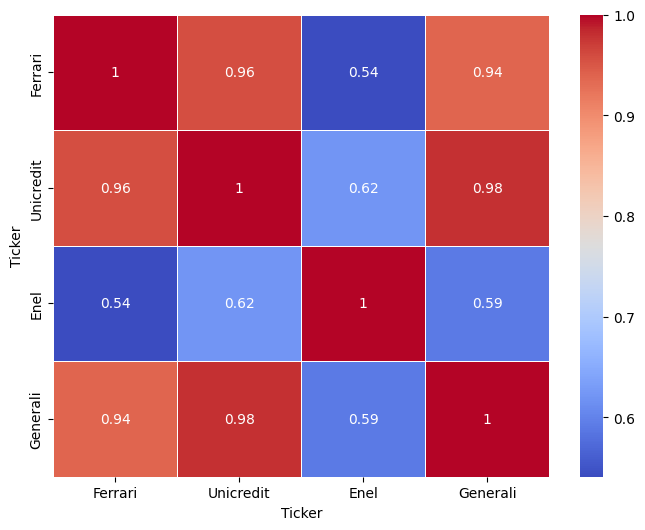

In [375]:
#Importing the necessary libraries for the heat map
import seaborn as sns
import matplotlib.pyplot as plt

#Creating the heat map for the visual representation of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(it_stocks_corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5);

From the heatmap of the correlation map we can see very high correlations between the pairs among Ferrari, Unicredit and Generali and Enel as the only asset bein really diverse from the other ones (but it can also be considered as a high correlation, even if much lower than the other ones).

Remembering that the statistical correlation measures the strength and direction of a linear relationship between two variables. It ranges from -1 (perfect negative), through 0 (no correlation), to +1 (perfect positive).

### US ETF's - Creating the basket with market representative american ETF's

Now we will have a look at the american ETF's per higher Assets Under Management (AUM) as in May 27th 2025, but here with a particularity, also including for a level of diversification on that. The chosen assets are:

* **VOO** -> Vanguard S&P 500 - Large-cap market
* **BND** -> Vanguard Total Bond Market - Bonds
* **GLD** -> SPDR Gold Trust - Commodities
* **IJR** -> iShares Core S&P Small-cap - Small-cap market

The purpose of this ETF's selection is more on didatic terms, but also tries to create a spectrum of assets which can represent the stability, growth power and wideness of the american economy and stock market

In [376]:
#Creating the list with selected american ETF's
us_tickers = ['VOO', 'BND', 'GLD', 'IJR']

In [377]:
#Importing their price data
us_assets = yf.download(us_tickers, period='5y')['Close']

[*********************100%***********************]  4 of 4 completed


In [378]:
#Visualizing the price's data frame
us_assets.head()

Ticker,BND,GLD,IJR,VOO
Date,,,,
2020-05-29,76.295647,162.910004,61.171383,259.157532
2020-06-01,76.233894,163.660004,61.846550,260.287720
2020-06-02,76.294754,162.600006,62.549458,262.427643
2020-06-03,76.120880,159.600006,64.685921,265.892334
2020-06-04,75.938278,161.279999,65.555313,265.216125


In [379]:
#Renaming the columns for an easier understanding of the data
us_assets.rename(columns={'VOO': 'SP500', 'BND': 'Bonds', 'GLD': 'Gold', 'IJR': 'Smallcaps'}, inplace=True)

In [380]:
#The following code line is not necessary here, as we have deleted Bitcoin from the list, considering that it is not an exclusive american security
#us_assets = us_assets[us_assets.index.dayofweek < 5]

In [381]:
#Controlling if the data frame structure is correct
us_assets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-05-29 to 2025-05-28
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bonds      1256 non-null   float64
 1   Gold       1256 non-null   float64
 2   Smallcaps  1256 non-null   float64
 3   SP500      1256 non-null   float64
dtypes: float64(4)
memory usage: 49.1 KB


### US ETF's - Evaluating returns by normalizing prices

In [382]:
#Normalizing all the single price data and visualizing the normalized returns data frame
us_assets_norm = us_assets.div(us_assets.iloc[0])
us_assets_norm.head()

Ticker,Bonds,Gold,Smallcaps,SP500
Date,,,,
2020-05-29,1.000000,1.000000,1.000000,1.000000
2020-06-01,0.999191,1.004604,1.011037,1.004361
2020-06-02,0.999988,0.998097,1.022528,1.012618
2020-06-03,0.997709,0.979682,1.057454,1.025987
2020-06-04,0.995316,0.989994,1.071666,1.023378


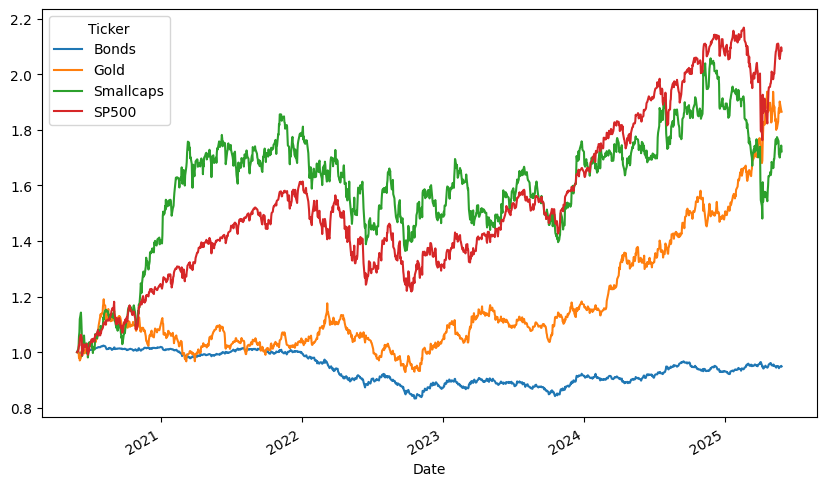

In [383]:
#Visualizing the normalized returns plot
us_assets_norm.plot(figsize=(10,6));

In [384]:
#Importing the Panda's library for data frame manipulation
import pandas as pd

In [385]:
#Creating a portfolio with both italian assets (considered as one single aggregated column) and american ETF's
portfolio_norm = pd.concat([us_assets_norm, it_stocks_norm['IT Stocks']], axis=1)

In [386]:
#Controlling if the data frame structure is correct
portfolio_norm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1292 entries, 2020-05-29 to 2025-05-29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bonds      1256 non-null   float64
 1   Gold       1256 non-null   float64
 2   Smallcaps  1256 non-null   float64
 3   SP500      1256 non-null   float64
 4   IT Stocks  1274 non-null   float64
dtypes: float64(5)
memory usage: 60.6 KB


In [387]:
#Handling NA values
portfolio_norm.isna().sum()

,0
Bonds,36
Gold,36
Smallcaps,36
SP500,36
IT Stocks,18


In [388]:
#Deleting the NA rows
portfolio_norm.dropna(how='any', inplace=True)

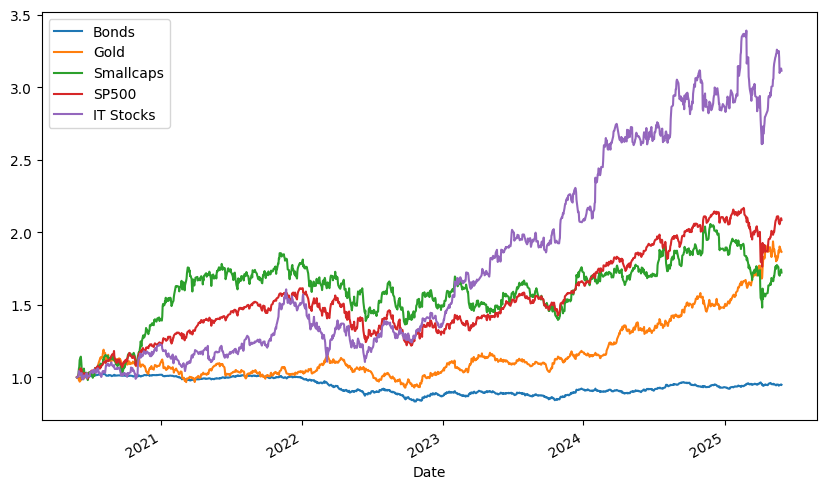

In [389]:
#Checking if NA data manipulation was done correctly
portfolio_norm.plot(figsize=(10,6));

From the plot above we can already conclude that the italian assets have overperformed the american ETF's over the last period of five years, what is  very surprising.

### US ETF's - Evaluating the correlation between the single assets

In [390]:
#Creating and visualizing the correlation matrix among all assets
portfolio_norm_corr = portfolio_norm.corr()
portfolio_norm_corr

,Bonds,Gold,Smallcaps,SP500,IT Stocks
Bonds,1.000000,-0.028591,-0.132283,-0.199526,-0.330083
Gold,-0.028591,1.000000,0.449889,0.825461,0.866193
Smallcaps,-0.132283,0.449889,1.000000,0.815252,0.608628
SP500,-0.199526,0.825461,0.815252,1.000000,0.933898
IT Stocks,-0.330083,0.866193,0.608628,0.933898,1.000000


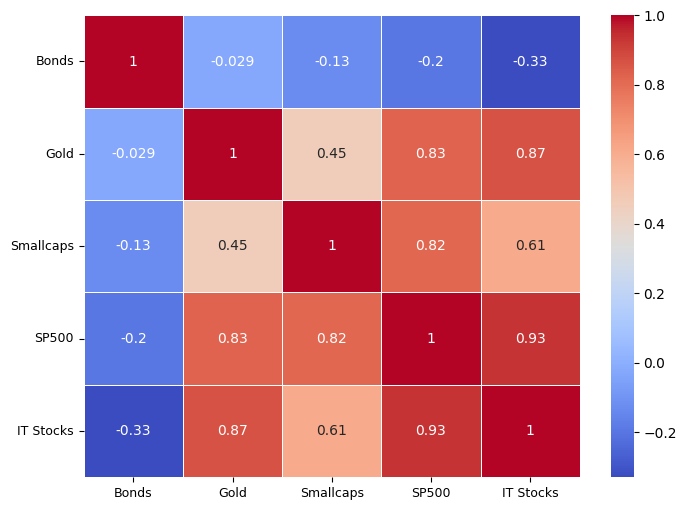

In [391]:
#Creating the heat map for the visual representation of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(portfolio_norm_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.show();

From the heat map of the correlation matrix we can make two special conclusions:

- The Bond's ETF has a very particular behavior, differing deeply from the other assets (very good for diversification, even if with a lower return, it still a safe port in terms of not losing money
- The italian basket of assets, not surprisingly but interestingly, follows consistently the behavior of the other american ETF's, with high correlations among them (specially with Gold and S&P 500

In [392]:
#Calculating and printing the annualized return of each of the american ETF's
portfolio_norm_us = portfolio_norm.iloc[:,:-1]

for i in portfolio_norm_us.columns:
  annualized_return = portfolio_norm_us[i].iloc[-1]**(1/5)
  print('The annualized return of ' + i + ' over the period 2020-2025 is of: ' + str(round(annualized_return,2)) + '%')

The annualized return of Bonds over the period 2020-2025 is of: 0.99%
The annualized return of Gold over the period 2020-2025 is of: 1.13%
The annualized return of Smallcaps over the period 2020-2025 is of: 1.11%
The annualized return of SP500 over the period 2020-2025 is of: 1.16%


## Part II - Performing portfolio's risk analysis

### Assuming a portfolio with equally weighted assets

In [393]:
#Making a recap from what we have as initial data frames
us_assets.head()

Ticker,Bonds,Gold,Smallcaps,SP500
Date,,,,
2020-05-29,76.295647,162.910004,61.171383,259.157532
2020-06-01,76.233894,163.660004,61.846550,260.287720
2020-06-02,76.294754,162.600006,62.549458,262.427643
2020-06-03,76.120880,159.600006,64.685921,265.892334
2020-06-04,75.938278,161.279999,65.555313,265.216125


In [394]:
it_stocks.head()

Ticker,Enel,Generali,Ferrari,Unicredit,IT Stocks
Date,,,,,
2020-05-29,5.028013,8.929740,146.995285,6.095869,167.048907
2020-06-01,5.098687,9.219414,147.237228,6.286713,167.842042
2020-06-02,5.237848,9.498354,147.575928,6.389291,168.701421
2020-06-03,5.467354,9.973987,151.979034,6.719293,174.139668
2020-06-04,5.453511,10.016903,150.188736,6.770978,172.430128


In [395]:
#Creating the base data frame for the upcoming analysis
portfolio = pd.concat([us_assets, it_stocks['IT Stocks']], axis=1)
portfolio

,Bonds,Gold,Smallcaps,SP500,IT Stocks
Date,,,,,
2020-05-29,76.295647,162.910004,61.171383,259.157532,167.048907
2020-06-01,76.233894,163.660004,61.846550,260.287720,167.842042
2020-06-02,76.294754,162.600006,62.549458,262.427643,168.701421
2020-06-03,76.120880,159.600006,64.685921,265.892334,174.139668
2020-06-04,75.938278,161.279999,65.555313,265.216125,172.430128
...,...,...,...,...,...
2025-05-23,72.190002,309.750000,103.989998,532.400024,517.379011
2025-05-26,NaN,NaN,NaN,NaN,521.929996
2025-05-27,72.529999,304.500000,106.629997,543.340027,522.559986


In [396]:
#Handling NA values
portfolio.isna().sum()

,0
Bonds,36
Gold,36
Smallcaps,36
SP500,36
IT Stocks,18


In [397]:
portfolio = portfolio.dropna(how='any')

In [398]:
#Controlling if the index has the correct data type
portfolio.index

DatetimeIndex(['2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11',
               ...
               '2025-05-14', '2025-05-15', '2025-05-16', '2025-05-19',
               '2025-05-20', '2025-05-21', '2025-05-22', '2025-05-23',
               '2025-05-27', '2025-05-28'],
              dtype='datetime64[ns]', name='Date', length=1238, freq=None)

In [399]:
#Creating a new dataframe with the aggregated price for the portfolio
#Then, converting this object into a data frame
portfolio_prices = portfolio.sum(axis=1)
portfolio_prices = portfolio_prices.to_frame()
portfolio_prices.columns = ['Prices']
portfolio_prices

,Prices
Date,
2020-05-29,726.583472
2020-06-01,729.870210
2020-06-02,732.573282
2020-06-03,740.438809
2020-06-04,740.419844
...,...
2025-05-21,1560.741015
2025-05-22,1550.783996
2025-05-23,1535.709036


In [400]:
#Create a new column for the returns
portfolio_prices['Returns'] = portfolio_prices['Prices'].pct_change()
portfolio_prices = portfolio_prices.dropna()

In [401]:
#Checking if the newly created column is correct
portfolio_prices.tail()

,Prices,Returns
Date,,
2025-05-21,1560.741015,-0.006562
2025-05-22,1550.783996,-0.006380
2025-05-23,1535.709036,-0.009721
2025-05-27,1549.560009,0.009019
2025-05-28,1541.864983,-0.004966


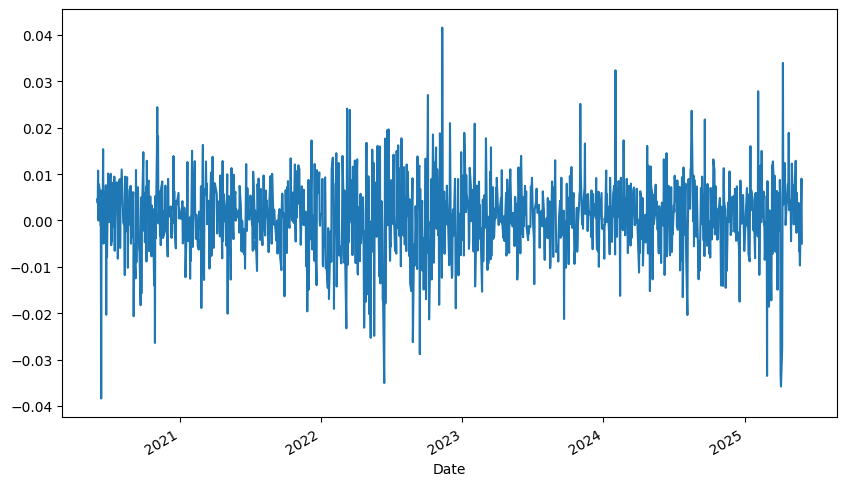

In [402]:
#Visualizing the portfolio's returns as a time series
portfolio_prices['Returns'].plot(figsize=(10,6));

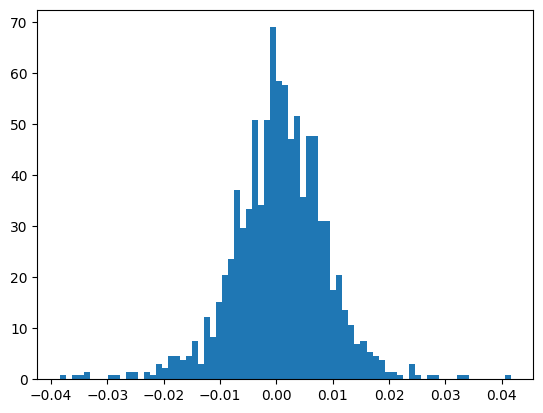

<Figure size 1000x600 with 0 Axes>

In [403]:
#Visualizing the portfolio's returns as a histogram
plt.hist(portfolio_prices['Returns'], bins=75, density=True)
plt.figure(figsize=(10, 6))
plt.show();

In the Shapiro-Wilk normality test, the hypotheses are:

* **Null hypothesis (H₀):** the data follows a normal distribution.

* **Alternative hypothesis (H₁):** the data does not follow a normal distribution.

That is, if the p-value of the test is less than the significance level (e.g., 0.05), H₀ is rejected — indicating that the data is not normally distributed. If the p-value is greater, H₀ is not rejected, suggesting that the data may be normal.

In [404]:
#Testing the portfolio's returns for normality
from scipy import stats

p_value = stats.shapiro(portfolio_prices['Returns'])[1]
print(f"p-value: {p_value}")

if p_value <= 0.05:
    print("Null hypothesis of normality is rejected. Data is non-normal.")
else:
    print("Null hypothesis of normality is accepted. Data is normal")

p-value: 8.65848776993794e-14
Null hypothesis of normality is rejected. Data is non-normal.


That indicates to us that the distribution of returns follow a non-normal distribution. This would, in many cases, affect the applicability of some parametric tools we could use for data analysis.

For the sake of simplicity, we will consider out distribution as normal.

Now let's go through some steps, techniques and concepts for a portfolio risk analysis

**Average daily return**

This metric is the most initial and simples one for an investiment's portfolio, as the single average of the daily returns.

In [405]:
import numpy as np

portfolio_daily_return = np.mean(portfolio_prices['Returns'])
print(f"The portfolio average daily return is of: {round(portfolio_daily_return*100,5)}%")

The portfolio average daily return is of: 0.06427%


**Average annualized return**

To convert the **average daily return** of a portfolio into an **annualized return**, we need to use the formula:

$$
\text{Annualized return} = (1 + \text{average daily return})^{n} - 1
$$

Where:

* $\text{average daily return}$ is the mean daily return (in decimal form, e.g., 0.001 for 0.1%)
* $n$ is the number of trading days in a year (typically $252$ in financial markets).


This metric is the expected rate of return a portfolio generates per year, accounting for compounding effects. It allows us to have an estimate on how high the portfolio return was in terms of an annualized evaluation period. It does not represent any concret return figure, hence is just intended to give us an impression about how good the portfolio has performed and enable us to compare it with many other assets or portfolios.

In [406]:
portfolio_annualized_return = (((1+portfolio_daily_return)**252)-1)
print(f"The portfolio annualized return is of: {round(portfolio_annualized_return*100,5)}%")

The portfolio annualized return is of: 17.57657%


An annual return of approximmately 17% can be considered as very good, even before taxes.

**Portfolio periodic volatility (standard deviation)**

First of all we need to clarify that we are here analysing the aggregated data of all single asset prices, that's why we are approaching it as if it was a single asset, enabling us a more simple approach on the metrics calculation.

This metric refers to the volatility or variance of a portfolio over a specific time period, in our case daily. The volatility is usually computed as the standard deviation of returns for that period.

In [407]:
portfolio_volatility = np.std(portfolio_prices['Returns'])
print(f"The portfolio periodic volatility is of: {round(portfolio_volatility*100,5)}%")

The portfolio periodic volatility is of: 0.82802%


**Portfolio periodic variance**

First of all we need to clarify that we are here analysing the aggregated data of all single asset prices, that's why we are approaching it as if it was a single asset, enabling us a more simple approach on the metrics calculation.

This metric measures the dispersion of returns over a specific time period, in our case daily. It is directed related with the volatility (standard deviation) as it is simply the square of the volatility.

In [408]:
portfolio_variance = (portfolio_volatility**2)
print(f"The portfolio periodic variance is of: {round(portfolio_variance*100,5)}%")

The portfolio periodic variance is of: 0.00686%


**Portfolio annualized volatility**

First of all we need to clarify that we are here analysing the aggregated data of all single asset prices, that's why we are approaching it as if it was a single asset, enabling us a more simple approach on the metrics calculation.

It is a metric of how much the portfolio's returns fluctuate over a year. It is derived from the standard deviation of periodic returns and adjusted for the annual time frame. Since investors often compare risk across assets on a yearly basis, periodic volatility is typically scaled to an annual measure.

To convert **daily volatility** (standard deviation of daily returns) into **annualized volatility**, use the formula:

$$
\text{Annualized volatility} = \text{Daily volatility} \times \sqrt{n}
$$

Where:

* $\text{Daily volatility}$ is the standard deviation of daily returns (in decimal form)
* $n$ is the number of trading days in a year (usually 252)

In [409]:
portfolio_annualized_volatility = portfolio_volatility*np.sqrt(252)
print(f"The portfolio annualized volatility is of: {round(portfolio_annualized_volatility,5)}%")

The portfolio annualized volatility is of: 0.13144%


**Portfolio Skewness**

Skewness measures the asymmetry of a data distribution. In finance, it's especially relevant for the analysis of investment returns, helping investors understand potential risk.

* **Positive Skew (Right-Skewed)**: Returns have a long tail on the right, meaning occasional large gains but more frequent small losses (less interesting for the investor). Positive skew suggests a higher probability of outsized gains rather than unexpected crashes.

* **Negative Skew (Left-Skewed)**: Returns have a long tail on the left, meaning occasional large losses but more frequent small gains (more interesting for the investor).

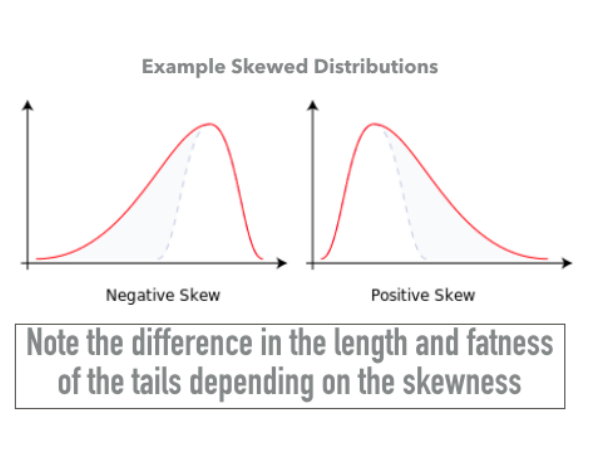

In [410]:
from IPython.display import display
from PIL import Image

image_skewness = "/content/Skewness.png"
img_sk = Image.open(image_skewness)
display(img_sk)

#Source: Datacamp

In [411]:
from scipy.stats import skew
portfolio_skewness = skew(portfolio_prices['Returns'])
print(f"Portfolio Skewness: {round(portfolio_skewness,5)}")

Portfolio Skewness: -0.283


Meaning that our portfolio presents a long tail on the left, with occasional losses but more frequent small gains. The absolute value is small therefore we can consider it as a weak level of skewness.

* |Skewness| < 0.5: approximately symmetric (weak skew).
* 0.5 ≤ |Skewness| < 1: moderately skewed.
* |Skewness| ≥ 1: highly skewed (strong asymmetry).

This interpretation is heuristic, but commonly used in finance and data analysis to judge the shape of a distribution.

**Portfolio Kurtosis**

Kurtosis measures the shape of a distribution’s tails, how extreme values (outliers) behave compared to a normal distribution.

In finance, it's useful for assessing risk in investment returns.

* **High Kurtosis (Leptokurtic):** Distribution has fat tails, meaning a higher likelihood of extreme gains or losses. This suggests higher risk, as rare but significant movements can occur.

* **Low Kurtosis (Platykurtic):** Distribution has thin tails, meaning fewer extreme fluctuations. Returns are more stable with less likelihood of sudden shocks.

**A normal distribution has a kurtosis of 3 (mesokurtic)**. When evaluating financial assets, investors may prefer low kurtosis for predictability, but high kurtosis might indicate opportunities for big gains—or big losses, when timely and correct identified.

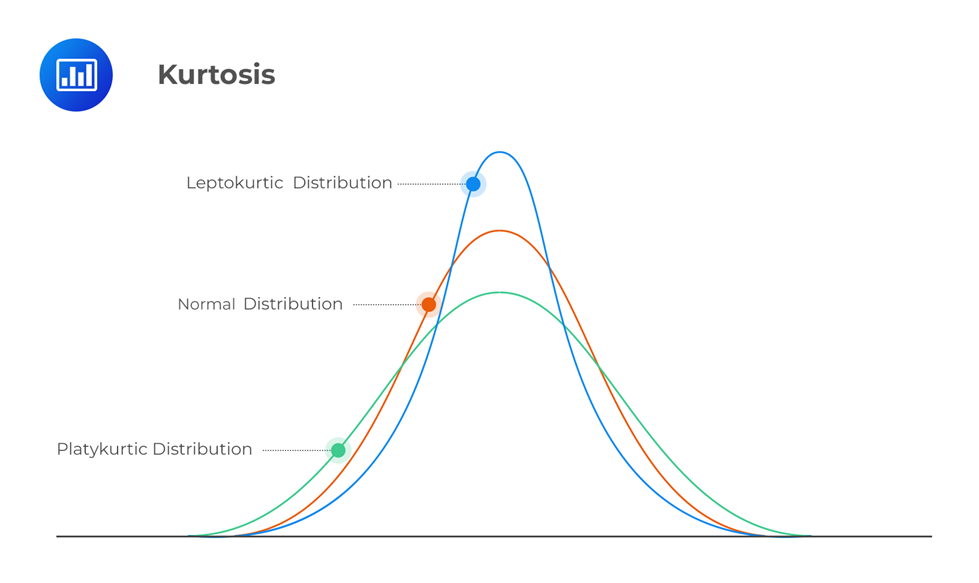

In [412]:
from IPython.display import Image, display
from PIL import Image

image_kurtosis = "/content/Kurtosis.png"
img_ku = Image.open(image_kurtosis)
display(img_ku)

#Source: AnalystPrep

In [413]:
from scipy.stats import kurtosis
portfolio_kurtosis = kurtosis(portfolio_prices['Returns'])
print(f"Portfolio Kurtosis: {round(portfolio_kurtosis, 5)}")

Portfolio Kurtosis: 2.332


Indicating that we have a slightly low kurtosis level (platykurtic) and we should at some level be attented to the risk of rare but significant gains or losses.

### Studying a portfolio's optimization with non equally weighted assets

In [414]:
#Turning back to the returns of the single italian assets
it_stocks_returns = it_stocks.pct_change()
it_stocks_returns

Ticker,Enel,Generali,Ferrari,Unicredit,IT Stocks
Date,,,,,
2020-05-29,NaN,NaN,NaN,NaN,NaN
2020-06-01,0.014056,0.032439,0.001646,0.031307,0.004748
2020-06-02,0.027294,0.030256,0.002300,0.016317,0.005120
2020-06-03,0.043817,0.050075,0.029836,0.051649,0.032236
2020-06-04,-0.002532,0.004303,-0.011780,0.007692,-0.009817
...,...,...,...,...,...
2025-05-23,-0.005539,-0.009298,-0.035755,-0.029684,-0.032998
2025-05-26,0.006313,0.005752,0.008795,0.010977,0.008796
2025-05-27,-0.007380,-0.000903,0.000942,0.005696,0.001207


In [415]:
#Turning back for the return of the american ETF's
us_assets_returns = us_assets.pct_change()
us_assets_returns

Ticker,Bonds,Gold,Smallcaps,SP500
Date,,,,
2020-05-29,NaN,NaN,NaN,NaN
2020-06-01,-0.000809,0.004604,0.011037,0.004361
2020-06-02,0.000798,-0.006477,0.011365,0.008221
2020-06-03,-0.002279,-0.018450,0.034156,0.013202
2020-06-04,-0.002399,0.010526,0.013440,-0.002543
...,...,...,...,...
2025-05-21,-0.006222,0.007379,-0.027600,-0.016719
2025-05-22,0.002782,-0.008861,-0.000956,0.000467
2025-05-23,0.001526,0.021906,-0.005261,-0.006753


**Building the portfolio and defining its parameters**

In [416]:
#Aggregating all of that in the same data frame (individual asset's data)
#In the case of the italian assets, we're just getting the aggregated value
portfolio_ind_returns = pd.concat([us_assets_returns, it_stocks_returns['IT Stocks']], axis=1)

In [417]:
#handling the NA values
portfolio_ind_returns = portfolio_ind_returns.dropna()
portfolio_ind_returns

,Bonds,Gold,Smallcaps,SP500,IT Stocks
Date,,,,,
2020-06-01,-0.000809,0.004604,0.011037,0.004361,0.004748
2020-06-02,0.000798,-0.006477,0.011365,0.008221,0.005120
2020-06-03,-0.002279,-0.018450,0.034156,0.013202,0.032236
2020-06-04,-0.002399,0.010526,0.013440,-0.002543,-0.009817
2020-06-05,-0.000114,-0.020275,0.043736,0.025568,-0.003463
...,...,...,...,...,...
2025-05-21,-0.006222,0.007379,-0.027600,-0.016719,-0.000037
2025-05-22,0.002782,-0.008861,-0.000956,0.000467,-0.014000
2025-05-23,0.001526,0.021906,-0.005261,-0.006753,-0.032998


In [418]:
#Simulating a starting point for the asset's weighting in financial figures (i.e. Euros)
#Let's assume an initial investment of 10.000€
data = [2500, 2000, 1500, 1500, 2500]
index = ['sp500', 'bonds', 'gold', 'smallcaps', 'itstocks']

# Create the investment volume's data series
volume = pd.DataFrame(data=data, index=index)
volume.columns = ['Investment']
volume

,Investment
sp500,2500
bonds,2000
gold,1500
smallcaps,1500
itstocks,2500


**Asset's individual returns**

In [419]:
#Calculating the total invested amount
total = sum(data)

#Calculating and visualiziing the single weights
portfolio_weights = [(value / total) for value in data]
portfolio_weights = np.array(portfolio_weights)
portfolio_weights

array([0.25, 0.2 , 0.15, 0.15, 0.25])

**Aggregated portfolio return**

The way a portfolio is weighted impacts on how returns are calculated and how risk is distributed.

* **Equally Weighted Portfolio:** Each asset is given the same percentage allocation, regardless of individual performance or market value. Returns are calculated as the average of all assets’ returns. This approach reduces dependence on any single asset, but it doesn’t account for market capitalization or risk differences between assets.

* **Non-Equally Weighted Portfolio:** Assets are assigned different weights, usually based on factors like market capitalization, volatility, or investor preferences. Higher-weighted assets have a bigger impact on overall portfolio returns. Common methods include market-cap weighting (used in indexes like the S&P 500) or risk-adjusted weighting, where assets with lower volatility are given more weight.

When looking for stability, an equally weighted portfolio might help spread risk more evenly. On the other hand, when looking for higher potential returns (or exposure to specific assets), non-equally weighted strategies offer more flexibility.

In [420]:
#Calculating the returns of each single asset of the portfolio
portfolio_returns = portfolio_ind_returns.mul(portfolio_weights, axis=1).sum(axis=1)
portfolio_returns.columns = ['Portfolio Return']
portfolio_returns


,0
Date,
2020-06-01,0.004215
2020-06-02,0.003122
2020-06-03,0.010903
2020-06-04,0.000686
2020-06-05,0.005446
...,...
2025-05-21,-0.006737
2025-05-22,-0.004650
2025-05-23,-0.005289


In [421]:
#Adding the aggregated portfolio return to each row of the data frame and visualizing it
portfolio_ind_returns['Portfolio'] = portfolio_returns
portfolio_ind_returns

,Bonds,Gold,Smallcaps,SP500,IT Stocks,Portfolio
Date,,,,,,
2020-06-01,-0.000809,0.004604,0.011037,0.004361,0.004748,0.004215
2020-06-02,0.000798,-0.006477,0.011365,0.008221,0.005120,0.003122
2020-06-03,-0.002279,-0.018450,0.034156,0.013202,0.032236,0.010903
2020-06-04,-0.002399,0.010526,0.013440,-0.002543,-0.009817,0.000686
2020-06-05,-0.000114,-0.020275,0.043736,0.025568,-0.003463,0.005446
...,...,...,...,...,...,...
2025-05-21,-0.006222,0.007379,-0.027600,-0.016719,-0.000037,-0.006737
2025-05-22,0.002782,-0.008861,-0.000956,0.000467,-0.014000,-0.004650
2025-05-23,0.001526,0.021906,-0.005261,-0.006753,-0.032998,-0.005289


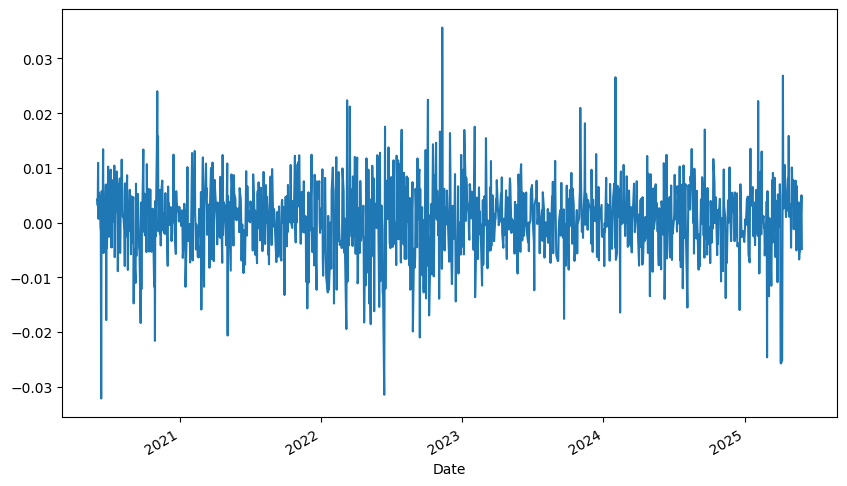

In [422]:
#Plotting the portfolio return
portfolio_ind_returns['Portfolio'].plot(figsize=(10,6));

**Cumulative returns on the single assets**

Measures the overall return from the start to the end of an investment period, considering compounding effects. It shows how much an investment grows (or shrinks) over multiple periods.

To calculate the **cumulative return** of a portfolio from **daily returns**, you use the following formula:

$$
\text{Cumulative Return} = \prod_{t=1}^{T} (1 + r_t) - 1
$$

Where:

* $r_t$ is the daily return at time $t$
* $T$ is the total number of days
* $\prod$ means the product over all days

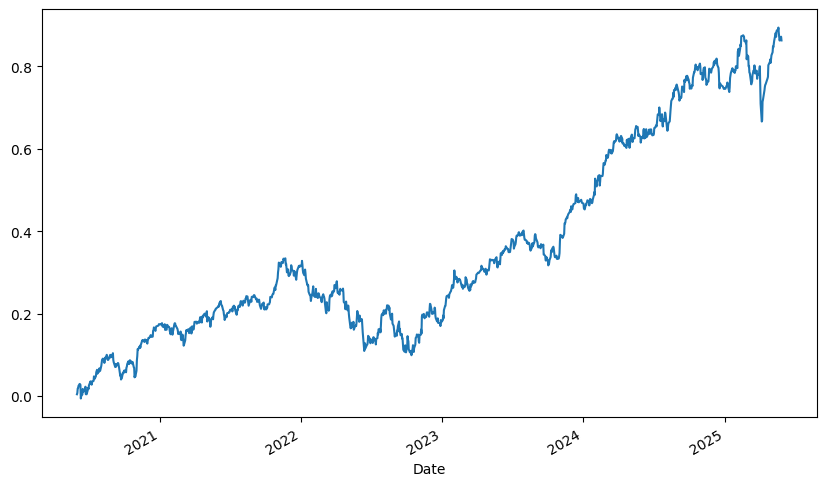

In [423]:
#Creating and plotting the cumulative returns of the portfolio
cumulative_returns = ((1 + portfolio_ind_returns['Portfolio']).cumprod() - 1)
cumulative_returns.plot(figsize=(10,6));

**Covariance matrix**

The covariance measures how two assets’ returns move together.

* **Positive covariance:** they tend to rise and fall together.
* **Negative covariance:** they tend to move in opposite directions.

$$
\text{Cov}(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$

Where:

* $n$ is the number of observations (e.g., days)
* $X_i$, $Y_i$ are the individual returns
* $\bar{X}$, $\bar{Y}$ are the mean returns of $X$ and $Y$

The covariance matrix extends this idea across multiple assets — creating a structured table where each row and column represents an asset, and each entry shows the covariance between two assets. The diagonal then represent the single variance of each asset.

In [432]:
#Creating the portfolio co-variance matrix
port_cov_matrix = portfolio_ind_returns.iloc[:-1,:-1].cov()
port_cov_matrix

,Bonds,Gold,Smallcaps,SP500,IT Stocks
Bonds,0.000014,0.000012,0.000008,0.000008,0.000005
Gold,0.000012,0.000093,0.000015,0.000016,0.000002
Smallcaps,0.000008,0.000015,0.000216,0.000132,0.000065
SP500,0.000008,0.000016,0.000132,0.000125,0.000061
IT Stocks,0.000005,0.000002,0.000065,0.000061,0.000221


In [433]:
#Annualizing the covariance matrix
port_cov_matrix_annual = port_cov_matrix * 252
port_cov_matrix_annual

,Bonds,Gold,Smallcaps,SP500,IT Stocks
Bonds,0.003523,0.003147,0.001956,0.001923,0.001180
Gold,0.003147,0.023546,0.003793,0.004035,0.000616
Smallcaps,0.001956,0.003793,0.054369,0.033250,0.016339
SP500,0.001923,0.004035,0.033250,0.031429,0.015269
IT Stocks,0.001180,0.000616,0.016339,0.015269,0.055761


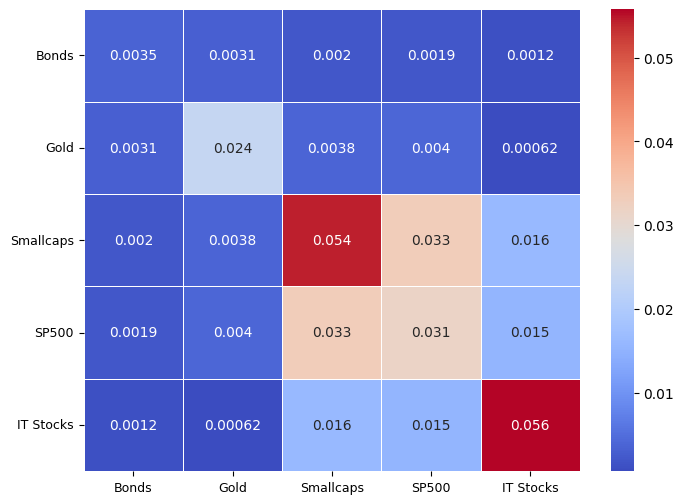

In [434]:
#Creating the heat map for the visual representation of the variance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(port_cov_matrix_annual, annot=True, cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.show();

From the heat map we can see that the most notable covariance is between S&P500 and Small-caps.

**Portfolio's volatility**

For the evaluation of an unequally weighted portfolio's volatiliy, the weights affect how much each asset contributes to overall volatility. The formula incorporates each asset’s weight, meaning higher-weighted assets influence volatility more.

$\sigma_p^2 = \frac{1}{N^2} \sum_{i=1}^{N} \sum_{j=1}^{N} \sigma_i \sigma_j \rho_{ij}$


𝑤𝑖, 𝑤j = Weights assigned to each asset

Other variables remain the same as in the equally weighted case.

In [435]:
#Calculating the portfolio's volatility (standard deviation) using covariance
port_vol = np.sqrt(np.dot(portfolio_weights.T, np.dot(port_cov_matrix, portfolio_weights)))
print(f"Portfolio's Volatility: {round(port_vol,5)}")

Portfolio's Volatility: 0.00682


**Portfolio's Sharpe Ratio**

The Sharpe Ratio measures excess return per unit of risk — the higher the ratio, the better the risk-adjusted performance.

Sharpe Ratio = (𝑅𝑝 − 𝑅𝑓) / 𝜎𝑝

* 𝑅𝑝 = Portfolio return
* 𝑅𝑓 = Risk-free rate (e.g., government bonds)
* 𝜎𝑝 = Portfolio volatility (standard deviation)

A higher Sharpe Ratio suggests that an investment is earning strong returns relative to its risk level.
A lower or negative Sharpe Ratio indicates that the portfolio may not be compensating investors adequately for its risk.

Investors use the Sharpe Ratio to compare different assets or portfolio strategies, helping them make more informed decisions about balancing return vs. risk.

In [456]:
portfolio_return = ((1+cumulative_returns[-1])**(1/5)) - 1 #Annualizing the cumulative return

us_rfr = 0.04984 # Risk free rate for the american assets - U.S. 20 Year Treasury Yield as in May 28th 2025
eu_rfr = 0.02172 # Risk free rate for the italiane assets - Euro Short-Term Rate as in May 28th 2025

risk_free_rate = ((us_rfr + eu_rfr) / 2) #Assuming for simplicity and didatic purposes an average value between both as the portfolio's risk free rate

portfolio_sharpe_ratio = (portfolio_return - risk_free_rate) / port_vol
print(f"Portfolio's Sharpe Ratio: {round(portfolio_sharpe_ratio,5)}")

Portfolio's Sharpe Ratio: 14.166


**Portfolio's Beta using Co-variance**

Portfolio Beta measures how a portfolio's returns move in relation to the market, helping investors assess systematic risk — the risk that cannot be eliminated through diversification.

$\beta_p = \sum_{i=1}^{N} w_i \beta_i$


* 𝛽𝑝 = Portfolio Beta
* 𝑤𝑖 = Weight of each asset in the portfolio
* 𝛽𝑖 = Beta of individual asset

For the Beta of each individual asset:

$\beta_i = \frac{\text{Cov}(R_i, R_m)}{\sigma_m^2}$


* 𝛽𝑖 = Beta of asset 𝑖
* Cov(𝑅𝑖,𝑅𝑚) = Covariance between asset returns (𝑅𝑖) and market returns
* (𝑅𝑚) - 𝜎𝑚2 = Variance of the market returns

How to interpret it:
* **Beta = 1** → Portfolio moves in sync with the market.
* **Beta > 1** → Portfolio is more volatile than the market, amplifying gains and losses.
* **Beta < 1** → Portfolio is less volatile, providing a cushion against market fluctuations.
* **Negative Beta** → Portfolio moves opposite to the market (rare, but possible with certain assets like gold or defensive stocks).

Investors use Beta to evaluate risk exposure, especially when constructing portfolios with stable or aggressive growth strategies.

In [457]:
#In our case we are evaluating the beta with reference on the SP500 variance
covariance_matrix = portfolio_ind_returns[['Portfolio','SP500']].cov()
covariance_coefficient = covariance_matrix.iloc[0, 1]
benchmark_variance = portfolio_ind_returns['SP500'].var()
port_beta = covariance_coefficient / benchmark_variance

print(f"Portfolio's Beta (using Co-variance): {round(port_beta,5)}")

Portfolio's Beta (using Co-variance): 0.47121


**Portfolio's Beta using Linear Regression**

Instead of using covariance and variance, this method estimates Beta by regressing portfolio returns against market returns. It takes advantage of the regression formula, which shows the strength of the relationship between portfolio & market. It allows for deeper analysis using statistical metrics (e.g., confidence intervals, significance testing) and is deeply used in financial modeling, stress testing, and sensitivity analysis.

Here we won't concentrate ourselves on how the linear regression works.

In [459]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Portfolio ~ SP500', data=portfolio_ind_returns)
fit = model.fit()
beta = fit.params["SP500"]
print(f"Portfolio's Beta (using Linear Regression): {round(beta,5)}")

Portfolio's Beta (using Linear Regression): 0.47121


Here we can see that both Beta calculation methods delivered us the same results, validating the calculations done.

A Beta value such as there indicates us that the portfolio is less volatility than the market and can provide us with some cushion to the market fluctuation.

The positive signal indicates that it moves in the same direction as the market.

**R-Squared vs Adjusted R-Squared**

R-Squared and Adjusted R-Squared are both measures of how well the linear regression model explains variations in portfolio returns based on market returns (S&P500).

It measures specifically the goodness-of-fit — how much of the portfolio’s return variation is explained by market returns and ranges from 0 to 1 (or 0% to 100%).

* A higher $R^2$ means market returns explain a greater portion of portfolio returns.
* A lower $R^2$ suggests the portfolio has independent movements, meaning market fluctuations don’t strongly influence its returns.



In [460]:
r_squared = fit.rsquared
print('R-Squared: ' + str(round(r_squared,5)))

adjusted_r_squared = fit.rsquared_adj
print('Adjusted R-Squared: ' + str(round(adjusted_r_squared,5)))

R-Squared: 0.59485
Adjusted R-Squared: 0.59452


From the R-Squared we can conclude that the market explains 60% of the variation in our portfolio results.

### Estimating tail risk


**Historical drawdown**

Historical Drawdown is a crucial risk metric in financial analysis, measuring the peak-to-trough decline of an investment or portfolio over time. It helps investors assess the worst-case losses they could face since the achieve of the peak return on a certain time frame.

Drawdown 𝑡 = (𝑃𝑡 − 𝑃max,𝑡) / 𝑃max,𝑡

* 𝑃𝑡 = Portfolio value at time 𝑡
* 𝑃max,𝑡 = Highest portfolio value up to time 𝑡

The maximum historical drawdown is the deepest drop experienced before recovery.

In [481]:
#Calculating the Portfolio's historical drawdown

running_max = np.maximum.accumulate(cumulative_returns)
drawdown = (cumulative_returns - running_max) / running_max

print(f"Portfolio's historical Drawdown: {drawdown}")

Portfolio's historical Drawdown: Date
2020-06-01    0.000000
2020-06-02    0.000000
2020-06-03    0.000000
2020-06-04    0.000000
2020-06-05    0.000000
                ...   
2025-05-21   -0.014277
2025-05-22   -0.024065
2025-05-23   -0.035146
2025-05-27   -0.024768
2025-05-28   -0.034906
Name: Portfolio, Length: 1237, dtype: float64


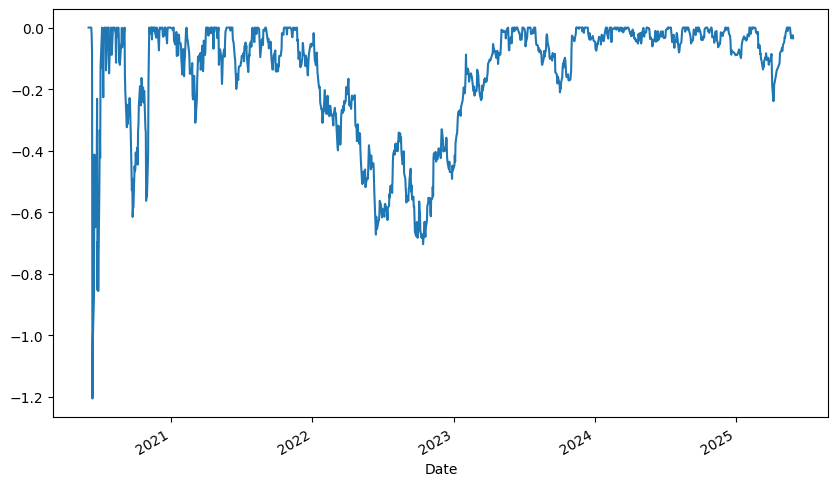

In [482]:
#Plotting the Portfolio's historical drawdown
drawdown.plot(figsize=(10,6));

**Historical Value at Risk**

VaR estimates the maximum potential loss over a given period, at a specific confidence level. It represents the worst-case loss one could experience, within a given probability (confidence level).

𝑉𝑎𝑅 = 𝜇 − 𝑍 * 𝜎

* 𝜇 = Expected return
* 𝑍 = Z-score based on confidence level
* 𝜎 = Portfolio standard deviation (volatility)

In [466]:
var_level = [90, 95, 99] #Defining the different VaR confidence levels to be calculated
var_value = []
for n in range(len(var_level)):
    var_value.append(np.percentile(portfolio_ind_returns['Portfolio'], 100 - var_level[n])) #Calculating and appending in a list the single portolio's VaR value for each level of risk

In [467]:
#Visualizing the VaR values for its different confidence levels
var_value

[np.float64(-0.00724651873517275),
 np.float64(-0.010784882893502793),
 np.float64(-0.01832502419512439)]

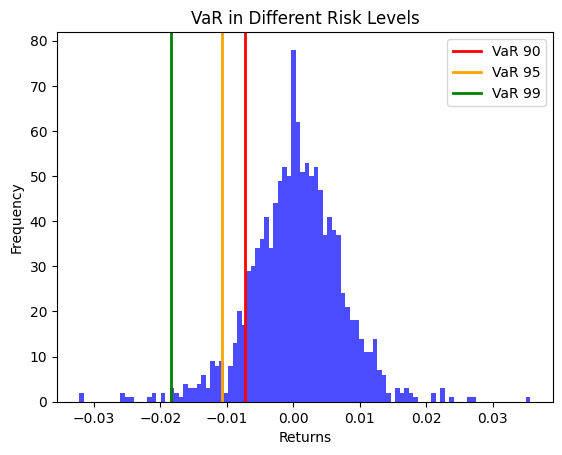

<Figure size 1000x600 with 0 Axes>

In [469]:
# Plotting the portfolio's return distribution and the differente VaR conficence levels
plt.hist(portfolio_ind_returns['Portfolio'], bins=100, alpha=0.7, color='blue')
plt.axvline(x=var_value[0], color='red', linestyle='-', linewidth=2, label='VaR 90')
plt.axvline(x=var_value[1], color='orange', linestyle='-', linewidth=2, label='VaR 95')
plt.axvline(x=var_value[2], color='green', linestyle='-', linewidth=2, label='VaR 99')
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()
plt.title("VaR in Different Risk Levels")

plt.figure(figsize=(10,6))
plt.show()

**Historical Conditional Value at Risk**

Also called Expected Shortfall (ES), CVaR provides a deeper risk measure by estimating the average loss beyond the VaR threshold. It represents cases where if losses exceed VaR, then what would the expected loss in average.

𝐶𝑉𝑎𝑅 = 𝐸(𝑅∣𝑅 < 𝑉𝑎𝑅)

Expected loss (E) is calculated for returns falling below the VaR threshold.

CVaR is a more conservative measure, especially in risk-sensitive portfolios, as it considers tail-risk (extreme losses beyond VaR). Many institutions prefer CVaR in stress testing and regulatory frameworks.

In [470]:
cvar_value = []

for n in range(len(var_value)):
    cvar_value.append(portfolio_ind_returns['Portfolio'][portfolio_ind_returns['Portfolio'] <= var_value[n]].mean()) #Calculating and appending in a list the single portolio's CVaR values for each confidence level

In [471]:
#Visualizing the CVaR values for its different confidence levels
cvar_value

[np.float64(-0.01198624382873128),
 np.float64(-0.015531251775271915),
 np.float64(-0.023408471680339223)]

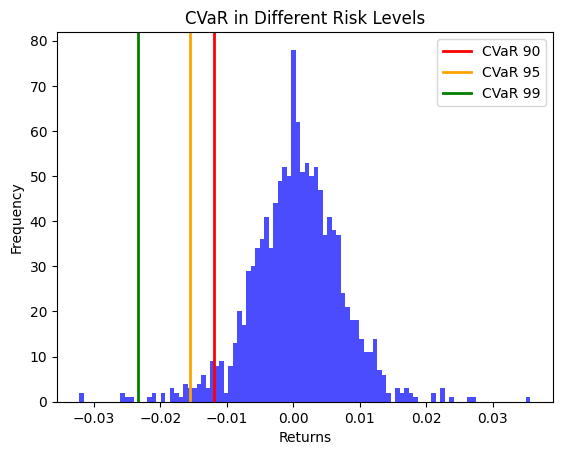

<Figure size 1000x600 with 0 Axes>

In [472]:
plt.hist(portfolio_ind_returns['Portfolio'], bins=100, alpha=0.7, color='blue')
plt.axvline(x=cvar_value[0], color='red', linestyle='-', linewidth=2, label='CVaR 90')
plt.axvline(x=cvar_value[1], color='orange', linestyle='-', linewidth=2, label='CVaR 95')
plt.axvline(x=cvar_value[2], color='green', linestyle='-', linewidth=2, label='CVaR 99')
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()
plt.title("CVaR in Different Risk Levels")

# Plotting the portfolio's return distribution and the differente VaR conficence levels
plt.figure(figsize=(10,6));
plt.show();

From both metrics VaR x CVaR we can see that the CVaR values are more extrem, hence the more conservative approach on calculating that.

### Random Walks and Monte Carlo Simulation

**Random Walks**

Random Walks and their hypothesis suggest that asset prices follow an unpredictable path, where each price movement is independent of past movements. This aligns with the idea that markets are efficient and reflect all available information for that specific period and event's context.

It states that the future prices cannot be reliably predicted based on past prices and that the returns fluctuate due to random shocks, news, and investor behavior.

It is often related to Efficient Market Hypothesis (EMH), suggesting that trying to time the market is futile.

In the Risk Analysis context it helps model price uncertainty, showing that past trends may not dictate future movements and supports risk management, emphasizing diversification rather than predicting trends.

In [475]:
#Creating the random walks
mu = np.mean(portfolio_ind_returns['Portfolio']) #Average portfolio's return
std = np.std(portfolio_ind_returns['Portfolio']) #Portfolio's standard deviation (volatility)
T = 252 #Number of periods in each walk, simulating each exchange's day in an year period
S0 = 10 #Starting point of each walk

sim_returns = [] #List to collect every single random walk path
for i in range(100): #For loop for the running of the single random walks
    rand_rets = np.random.normal(mu, std, T) + 1
    forecasted_values = S0 * (rand_rets.cumprod())
    sim_returns.append(forecasted_values)

**Monte Carlo Simulation**

Monte Carlo Simulation uses probabilistic modeling to generate multiple possible future scenarios, helping investors assess risk and uncertainty.

It is constructed upon the already approached random walks, having defined the  initial parameters (e.g., expected return, volatility). Then, it generates thousands of simulated price paths (one hundred in our case), each using random variations.

At the end, the investor will be able to analyze results, identify the likelihood of high losses (such as the VaR calculated below) or gains to be able to make informed decisions on portfolio construction based on risk tolerance.

In the context of Portfolio Risk Analysis, it can estimates potential future portfolio values under various risk conditions and helps stress-test portfolios to see how they might perform in extreme market scenarios.

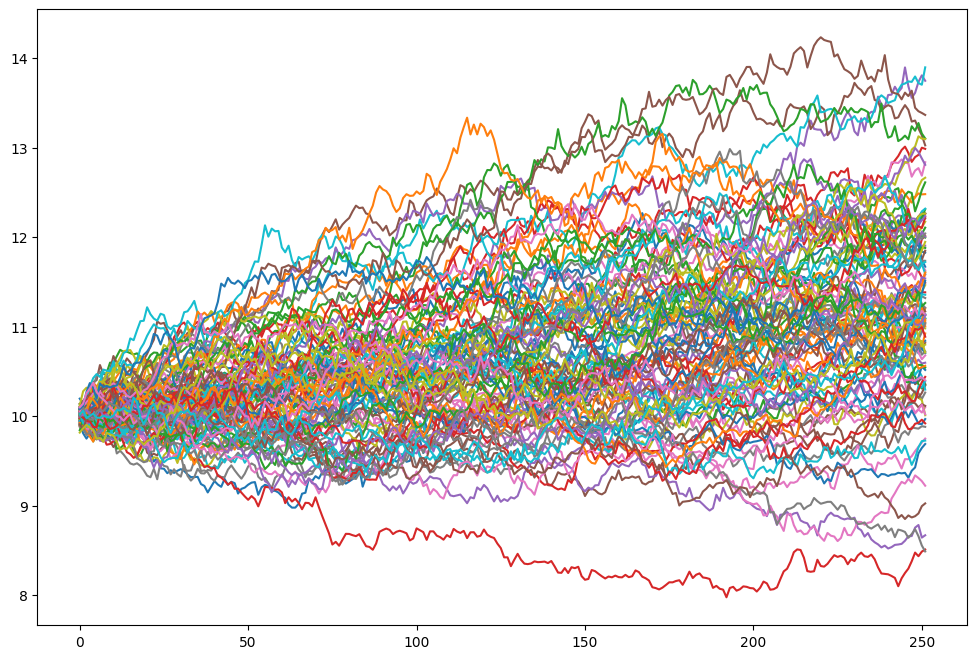

In [476]:
#Converting and transposing all the single paths from the list into a data frame
sim_returns_df = pd.DataFrame(sim_returns)
sim_returns_df = sim_returns_df.transpose()

#Plotting the Monte Carlo simulation
sim_returns_df.plot(legend=None, figsize=(12,8));

In [478]:
#Monte Carlo VaR
var_95 = np.percentile(sim_returns_df, 5) - 10 #Applying the VaR95 for the set of final returns got on the Monte Carlo simulation
print(f"Monte Carlo VaR at confidence level of 95: {round(var_95,5)}")

Monte Carlo VaR at confidence level of 95: -0.52888
